**Approach to CNN**
1. Download the images from the link
2. Unzip all the images
3. Load images and Libraries
4. Explore some of the images
5. Create Sequential model (Feature Extraction Layer + Classification Layer)
6. Declare the Layers
  1. Convolution Layer + ReLu Layer
  2. Pooling Layers
  3. Classification Layers
  4. Output Layers
7. Compile the model (Optimizer, Loss, Metrics)
8. Fit the model (i/p, o/p, epochs, batchsize)
9. Evaluate the Model




1. Download the images

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip


--2024-10-19 02:42:40--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 74.125.137.207, 142.250.101.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  53.6MB/s    in 1.2s    

2024-10-19 02:42:41 (53.6 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



2. Unzip all the images

In [3]:
!unzip '/content/cats_and_dogs_filtered.zip'

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

3.1 Load Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import seaborn as sns
import os

In [5]:
train_dir = '/content/cats_and_dogs_filtered/train'
val_dir = '/content/cats_and_dogs_filtered/validation'

3.2 Load the images

In [6]:
train_dataset = image_dataset_from_directory(train_dir, shuffle = True, batch_size=64, image_size=(160,160), seed = 123)



Found 2000 files belonging to 2 classes.


In [8]:
val_dataset = image_dataset_from_directory(val_dir, shuffle = True, batch_size=64, image_size=(160,160), seed = 123)

Found 1000 files belonging to 2 classes.


Create a Sequential Model with Layers

In [21]:
model = Sequential()
#Feature Extraction Layers
#Block1
model.add(Conv2D(64, (3,3), padding = 'same',activation = 'relu', input_shape = (160,160,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#Block2
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#Classification Layers
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 160, 160, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 80, 80, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 204800)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │      13,107,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,182,977 (50.29 MB)

 Trainable params: 13,182,977 (50.29 MB)

 Non-trainable params: 0 (0.00 B)

Compile the Model

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the Model

In [23]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [24]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs = 50, batch_size = 64, callbacks = [callback])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.4870 - loss: 487.4720 - val_accuracy: 0.4730 - val_loss: 0.6930
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.5230 - loss: 0.6901 - val_accuracy: 0.5020 - val_loss: 0.6933
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.5620 - loss: 0.6890 - val_accuracy: 0.5300 - val_loss: 0.6911
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5900 - loss: 0.6634 - val_accuracy: 0.5500 - val_loss: 0.6871
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6744 - loss: 0.6057 - val_accuracy: 0.5360 - val_loss: 0.6940
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.7190 - loss: 0.5405 - val_accuracy: 0.5840 - val_loss: 0.8241
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7536 - loss: 0.4652 - val_accuracy: 0.5750 - val_loss: 0.8988


Evaluate the Results

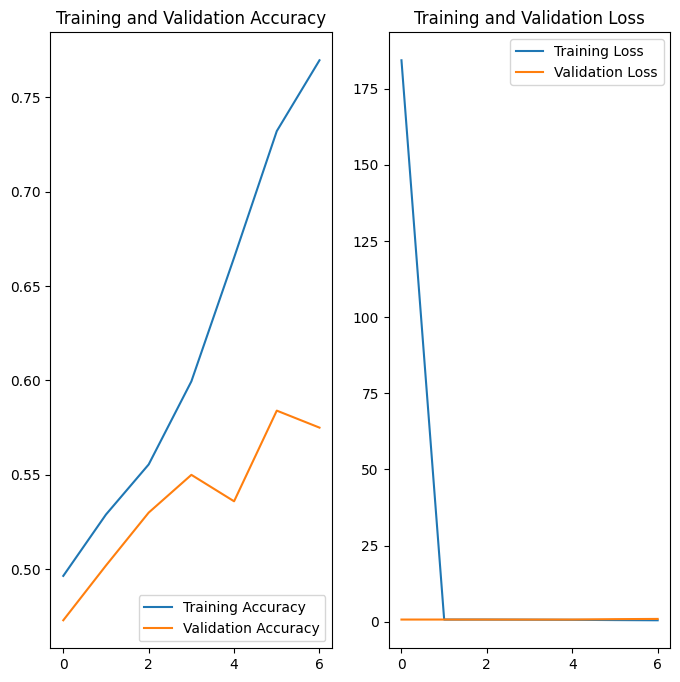

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

num_epochs = len(history.history['loss'])
epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       500
           1       0.51      0.53      0.52       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000

Confusion Matrix:
[[244 256]
 [233 267]]
Accuracy Score: 0.511


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

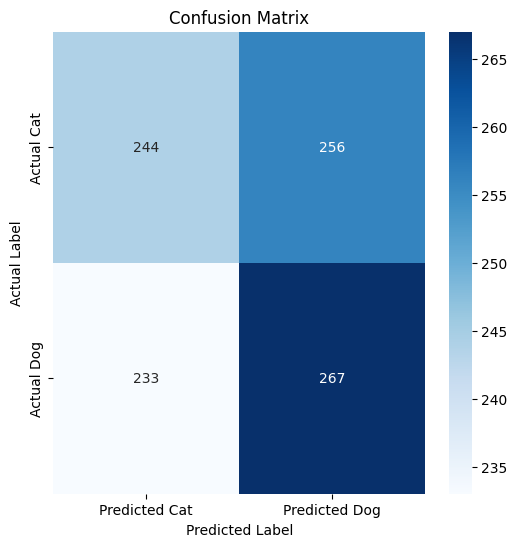

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get predictions on the test dataset
y_pred = model.predict(val_dataset)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in val_dataset], axis=0)


# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy Score:", accuracy)

# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Cat', 'Predicted Dog'],
            yticklabels=['Actual Cat', 'Actual Dog'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt
